In [1]:
#Load the needed dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from osgeo import gdal, ogr
import geopandas as gpd
import rasterio
from rasterio.plot import show
from shapely.geometry import box, shape

from rasterio.features import shapes


## straight gdal method

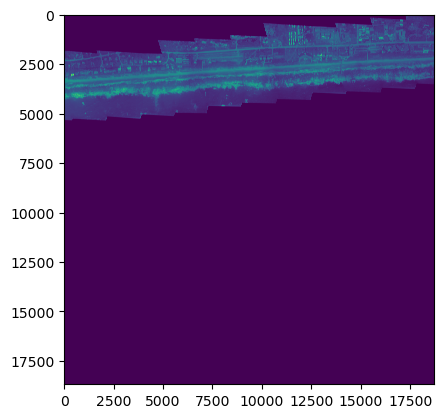

In [2]:
#First, load NOAA tiff using gdal, just a single band.
#I am going to use a pic of a Barrier island with buildings, but other possible pics are:

#Barrier island, but no buildings
#im_path = '../data/20180917a_RGB/20180917aC0753000w352830n.tif'
#Inland, with buildings
#im_path = '../data/20180917a_RGB/20180917aC0790300w333600n.tif'

im_path = '../data/20180917a_RGB/20180917aC0764800w344200n.tif'
dataset = gdal.Open(im_path, gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

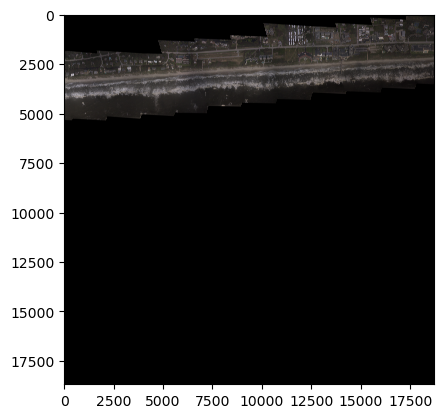

In [3]:
# since there are 3 bands, lets load all 3 and look a tthe image

band1 = dataset.GetRasterBand(1) # Red channel
band2 = dataset.GetRasterBand(2) # Green channel
band3 = dataset.GetRasterBand(3) # Blue channel

b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()

img = np.dstack((b1, b2, b3))
f = plt.figure()
plt.imshow(img)

## Rasterio method

/home/ebgoldstein/anaconda3/envs/roads/lib/python3.10/site-packages/rasterio/plot.py:109: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(rgb_indexes, masked=True)


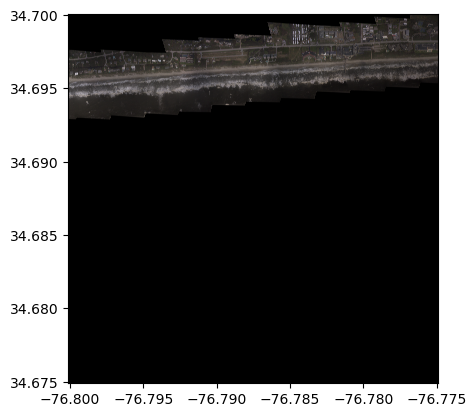

<AxesSubplot:>

In [4]:
#now, load the samle image using rasterio, just so to understand how to do it this way: 
srcIm = rasterio.open(im_path)
show(srcIm)

## Building

In [5]:
#Now, read in the downloaded MS building data, which si geojson for the entire state:

bldg_file = '../data/NorthCarolina.geojson'

buildings_gpd = gpd.read_file(bldg_file)

In [6]:
#To clip this geojson, i will use the bounds of the raster image.. 
#here is how to get the bounds of the raster w/ rasterio, and convert that to a shapefile
# https://gis.stackexchange.com/questions/352445/make-shapefile-from-raster-bounds-in-python 

bounds  = srcIm.bounds
print(bounds)

bounds_box = box(*bounds)
print(bounds_box.wkt)

bounds_gpd=gpd.GeoDataFrame(geometry=[bounds_box])
bounds_gpd=bounds_gpd.set_crs('EPSG:4326')
print(bounds_gpd)

BoundingBox(left=-76.8001, bottom=34.6749, right=-76.7749, top=34.7001)
POLYGON ((-76.7749 34.6749, -76.7749 34.7001, -76.8001 34.7001, -76.8001 34.6749, -76.7749 34.6749))
                                            geometry
0  POLYGON ((-76.77490 34.67490, -76.77490 34.700...


In [7]:
#The next step is to use the new shapefile bounding box to actually clip the geojson.. 

json_clipped = gpd.clip(buildings_gpd, bounds_gpd)
json_clipped.set_crs('EPSG:4326')
print('MS data clipped to raster bounds and downloaded')
print(json_clipped)

MS data clipped to raster bounds and downloaded
         release capture_dates_range  \
2883921        1                       
2882664        1                       
2729694        1                       
2729683        1                       
2729395        1                       
...          ...                 ...   
3038782        1                       
3038606        1                       
3872577        1                       
3038756        1                       
4444037        1                       

                                                  geometry  
2883921  POLYGON ((-76.78408 34.70007, -76.78404 34.700...  
2882664  POLYGON ((-76.78393 34.70008, -76.78389 34.700...  
2729694  POLYGON ((-76.79875 34.70000, -76.79897 34.699...  
2729683  POLYGON ((-76.79699 34.70009, -76.79720 34.700...  
2729395  POLYGON ((-76.78431 34.70009, -76.78439 34.700...  
...                                                    ...  
3038782  POLYGON ((-76.79901 34.69600, -76.7

In [8]:
#and now save the new clipped geojson

json_clipped.to_file('../data/test.geojson', driver="GeoJSON")
#json_clipped.to_file('../data/testtest.shp')

In [9]:
#inspect the details
json_clipped.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
#inspect the file
json_clipped.head()

,release,capture_dates_range,geometry
2883921,1,,"POLYGON ((-76.78408 34.70007, -76.78404 34.700..."
2882664,1,,"POLYGON ((-76.78393 34.70008, -76.78389 34.700..."
2729694,1,,"POLYGON ((-76.79875 34.70000, -76.79897 34.699..."
2729683,1,,"POLYGON ((-76.79699 34.70009, -76.79720 34.700..."
2729395,1,,"POLYGON ((-76.78431 34.70009, -76.78439 34.700..."


<AxesSubplot:>

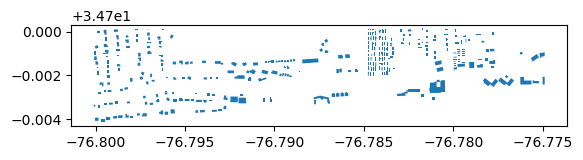

In [11]:
#plot it up
json_clipped.plot() 

In [26]:
#use a gdal CLI command to make a new blank raster with the bounds of the original tiff image
!gdal_calc.py -A ../data/20180917a_RGB/20180917aC0764800w344200n.tif --outfile buildings.tif --calc "A*0" --NoDataValue=0

0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 

63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 63.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 64.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 65.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 66.. 67.. 67.. 67.. 67.. 67.. 67.. 67.. 67.. 67.. 67.. 67.. 67.. 

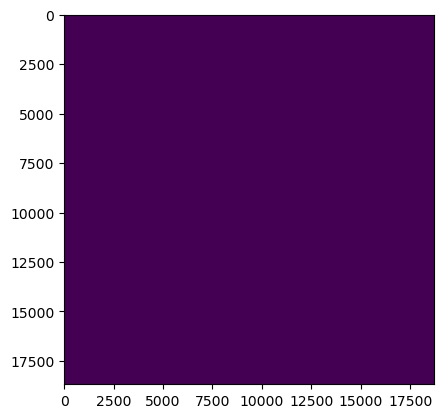

In [27]:
#Now display that new blank tiff, just to make sure it is empty. 

dataset = gdal.Open('buildings.tif', gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [28]:
#Now use the gdal CLI to burn in the geojson buildings into that new blank raster file

!gdal_rasterize -b 1 -burn 255 -l test ../data/test.geojson buildings.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


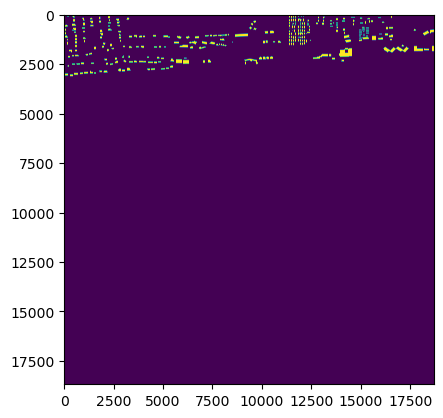

In [29]:
#plot new building raster
dataset = gdal.Open('buildings.tif', gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

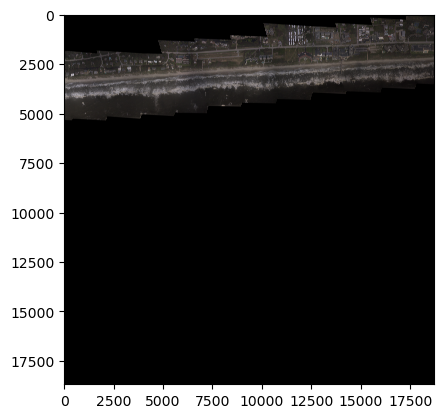

In [16]:
# and plot the original image
plt.imshow(img)

In [17]:
#https://gis.stackexchange.com/questions/296897/change-the-resolution-and-size-of-a-raster-with-gdal-in-python#296903
#https://gis.stackexchange.com/questions/400635/how-to-convert-geojson-to-geotiff
#https://gis.stackexchange.com/questions/220753/how-do-i-create-blank-geotiff-with-same-spatial-properties-as-existing-geotiff

In [18]:
#overlay plots...

/tmp/ipykernel_599357/1600452084.py:1: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  msk = srcIm.read_masks(1)


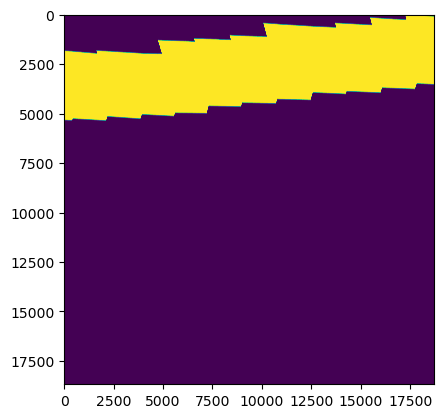

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [54]:
msk = srcIm.read_masks(1)
show(msk)
msk

In [47]:
#use a gdal CLI command to make a new raster with mask of the original tiff image
#https://gis.stackexchange.com/questions/397616/how-to-create-a-raster-from-nodata-values-using-gdal
# everything above -9999 is 255, everyhting else is 0

!gdal_calc.py -A ../data/20180917a_RGB/20180917aC0764800w344200n.tif --outfile mask.tif --calc "255*(A>-9999)"

0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 2.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 3.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 4.. 

40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 40.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 41.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 42.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 43.. 

94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 94.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 95.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 96.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 97.. 

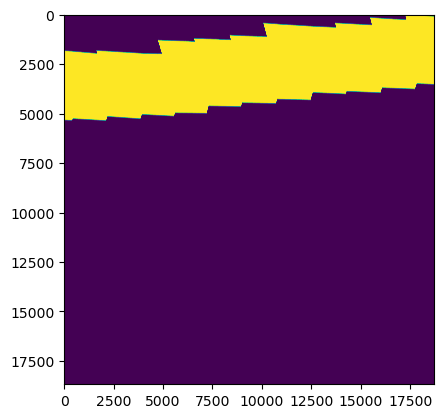

In [75]:
#Now display that mask tiff, just to make sure it is empty. 

dataset = gdal.Open('mask.tif', gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()
plt.imshow(arr)

In [76]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [83]:
#!gdal_calc.py -A buildings.tif -B mask.tif --outfile=result.tif --calc="A*B" --NoDataValue=0
!gdal_calc.py -A buildings.tif -B mask.tif --outfile=result.tif --calc="A*B" --NoDataValue=0

0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 0.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 1.. 

19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 19.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 20.. 

37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 37.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 38.. 

54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 54.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 55.. 

72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 72.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 73.. 

89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 89.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 90.. 

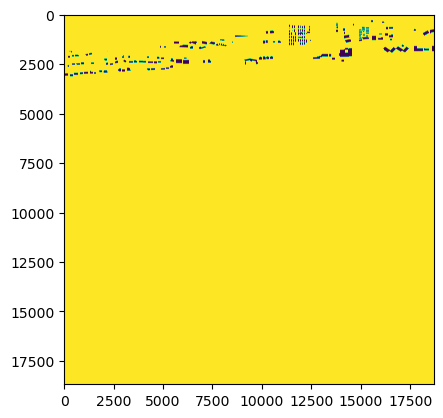

In [86]:
dataset = gdal.Open('result.tif', gdal.GA_ReadOnly) # Note GetRasterBand() takes band no. starting from 1 not 0
band = dataset.GetRasterBand(1)
arr = band.ReadAsArray()

plt.imshow(arr)

#note that data values are reversed... but this the correct idea..

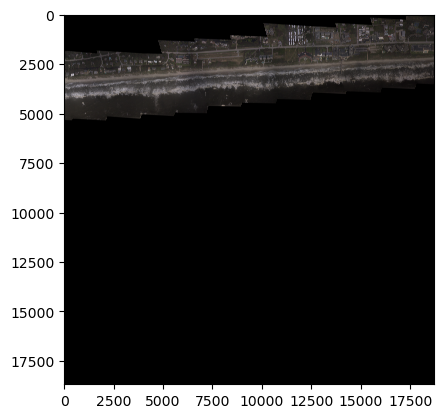

In [87]:
# and plot the original image
plt.imshow(img)

In [ ]:
#convert to jpeg
#https://gis.stackexchange.com/questions/26249/how-to-convert-qgis-generated-tiff-images-into-jpg-jpeg-using-gdal-command-line

!gdal_translate -of JPEG -scale -co worldfile=yes result.tif output.jpg
!gdal_translate -of JPEG -scale -co worldfile=yes ../data/20180917a_RGB/20180917aC0764800w344200n.tif image.jpg

#these make 18681 x 18681 pixel jpegs.. with both .wld and .aux.xml 



In [ ]:
# use imagemagick to cut into equal pieces
# https://www.imagemagick.org/Usage/crop/#crop_equal

#do this to both the image and the label
!convert image.jpg -crop 5x5@ +repage +adjoin image_5x5@_%d.jpg
!convert output.jpg -crop 5x5@ +repage +adjoin output_5x5@_%d.jpg